# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [2]:
(
    yf.pdr_override()
)

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [4]:
start = dt.datetime(2011,8,1)
end = dt.datetime(2020,8,1)

In [5]:
GOOG = \
(
    pdr.get_data_yahoo("GOOGL",
                      start = start,
                      end = end)
)
GOOG

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,15.295796,15.402903,14.994494,15.184434,15.184434,158485356
2011-08-02,15.165165,15.257007,14.804054,14.824825,14.824825,127895976
2011-08-03,14.871622,15.090090,14.605355,15.044294,15.044294,152874972
2011-08-04,14.877377,14.986236,14.451201,14.452452,14.452452,196387416
2011-08-05,14.578078,14.764765,14.064064,14.490490,14.490490,236926836
...,...,...,...,...,...,...
2020-07-27,75.663002,76.877998,75.616501,76.471497,76.471497,27124000
2020-07-28,76.250000,76.300499,75.026001,75.182503,75.182503,30910000
2020-07-29,75.250000,76.666496,75.150497,76.175499,76.175499,22676000


In [6]:
GOOGL = \
    GOOG.drop(['Open','High','Low','Close','Volume'], axis=1)

In [7]:
# Calculate 42 days moving average
GOOGL['SMA_42'] = \
    GOOGL['Adj Close'] \
    .rolling(window=42) \
    .mean()

GOOGL

,Adj Close,SMA_42
Date,,
2011-08-01,15.184434,NaN
2011-08-02,14.824825,NaN
2011-08-03,15.044294,NaN
2011-08-04,14.452452,NaN
2011-08-05,14.490490,NaN
...,...,...
2020-07-27,76.471497,73.369488
2020-07-28,75.182503,73.471167
2020-07-29,76.175499,73.578298


In [8]:
# Lets create 2 standard deviation threshold 
GOOGL['STD+2'] = \
    GOOGL['SMA_42'] + 2*(GOOGL['Adj Close'].rolling(42).std())

GOOGL['STD-2'] = \
    GOOGL['SMA_42'] - 2*(GOOGL['Adj Close'].rolling(42).std())

GOOGL

,Adj Close,SMA_42,STD+2,STD-2
Date,,,,
2011-08-01,15.184434,NaN,NaN,NaN
2011-08-02,14.824825,NaN,NaN,NaN
2011-08-03,15.044294,NaN,NaN,NaN
2011-08-04,14.452452,NaN,NaN,NaN
2011-08-05,14.490490,NaN,NaN,NaN
...,...,...,...,...
2020-07-27,76.471497,73.369488,78.349396,68.389580
2020-07-28,75.182503,73.471167,78.419764,68.522570
2020-07-29,76.175499,73.578298,78.562341,68.594254


In [9]:
# Calculate distance of Adj close value from moving average
GOOGL['DISTANCE'] = \
    GOOGL['Adj Close'] - GOOGL['SMA_42']

GOOGL

,Adj Close,SMA_42,STD+2,STD-2,DISTANCE
Date,,,,,
2011-08-01,15.184434,NaN,NaN,NaN,NaN
2011-08-02,14.824825,NaN,NaN,NaN,NaN
2011-08-03,15.044294,NaN,NaN,NaN,NaN
2011-08-04,14.452452,NaN,NaN,NaN,NaN
2011-08-05,14.490490,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-27,76.471497,73.369488,78.349396,68.389580,3.102008
2020-07-28,75.182503,73.471167,78.419764,68.522570,1.711336
2020-07-29,76.175499,73.578298,78.562341,68.594254,2.597201


In [10]:
# Create positions based on the distances
GOOGL['POSITION'] = \
    np.where(GOOGL['DISTANCE'] > (GOOGL['STD+2'] - GOOGL['SMA_42']), -1, np.nan)

GOOGL['POSITION'] = \
    np.where(GOOGL['DISTANCE'] < (GOOGL['STD-2'] - GOOGL['SMA_42']), 1, GOOGL['POSITION'])

GOOGL['POSITION'] = \
    np.where(GOOGL['DISTANCE'] * GOOGL['DISTANCE'].shift(1) < 0, 0, GOOGL['POSITION'])

GOOGL

,Adj Close,SMA_42,STD+2,STD-2,DISTANCE,POSITION
Date,,,,,,
2011-08-01,15.184434,NaN,NaN,NaN,NaN,NaN
2011-08-02,14.824825,NaN,NaN,NaN,NaN,NaN
2011-08-03,15.044294,NaN,NaN,NaN,NaN,NaN
2011-08-04,14.452452,NaN,NaN,NaN,NaN,NaN
2011-08-05,14.490490,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-07-27,76.471497,73.369488,78.349396,68.389580,3.102008,NaN
2020-07-28,75.182503,73.471167,78.419764,68.522570,1.711336,NaN
2020-07-29,76.175499,73.578298,78.562341,68.594254,2.597201,NaN


In [127]:
# forward fill the data and fillna with zero
GOOGL['POSITION'] = \
    GOOGL['POSITION'].ffill()

GOOGL['POSITION'] = \
    GOOGL['POSITION'].fillna(0)

GOOGL.dropna()

,Adj Close,SMA_42,STD+2,STD-2,DISTANCE,POSITION,RETURN,STRATEGY,CUMULATIVE RETURN,CUMULATIVE STRATEGY
Date,,,,,,,,,,
2011-09-28,13.234234,13.535792,14.777859,12.293724,-0.301558,0.0,-0.019660,-0.000000,0.871566,1.000000
2011-09-29,13.200701,13.488560,14.619653,12.357466,-0.287859,0.0,-0.002537,-0.000000,0.869357,1.000000
2011-09-30,12.888889,13.442466,14.506207,12.378725,-0.553577,0.0,-0.023904,-0.000000,0.848823,1.000000
2011-10-03,12.400400,13.379516,14.364870,12.394163,-0.979116,0.0,-0.038637,-0.000000,0.816652,1.000000
2011-10-04,12.560060,13.334459,14.291436,12.377482,-0.774400,0.0,0.012793,0.000000,0.827167,1.000000
...,...,...,...,...,...,...,...,...,...,...
2020-07-27,76.471497,73.369488,78.349396,68.389580,3.102008,-1.0,0.013972,-0.013972,5.036177,1.127016
2020-07-28,75.182503,73.471167,78.419764,68.522570,1.711336,-1.0,-0.017000,0.017000,4.951288,1.146338
2020-07-29,76.175499,73.578298,78.562341,68.594254,2.597201,-1.0,0.013121,-0.013121,5.016683,1.131395


### <font color = red> Answer 1 is presented in the cell below: </font>

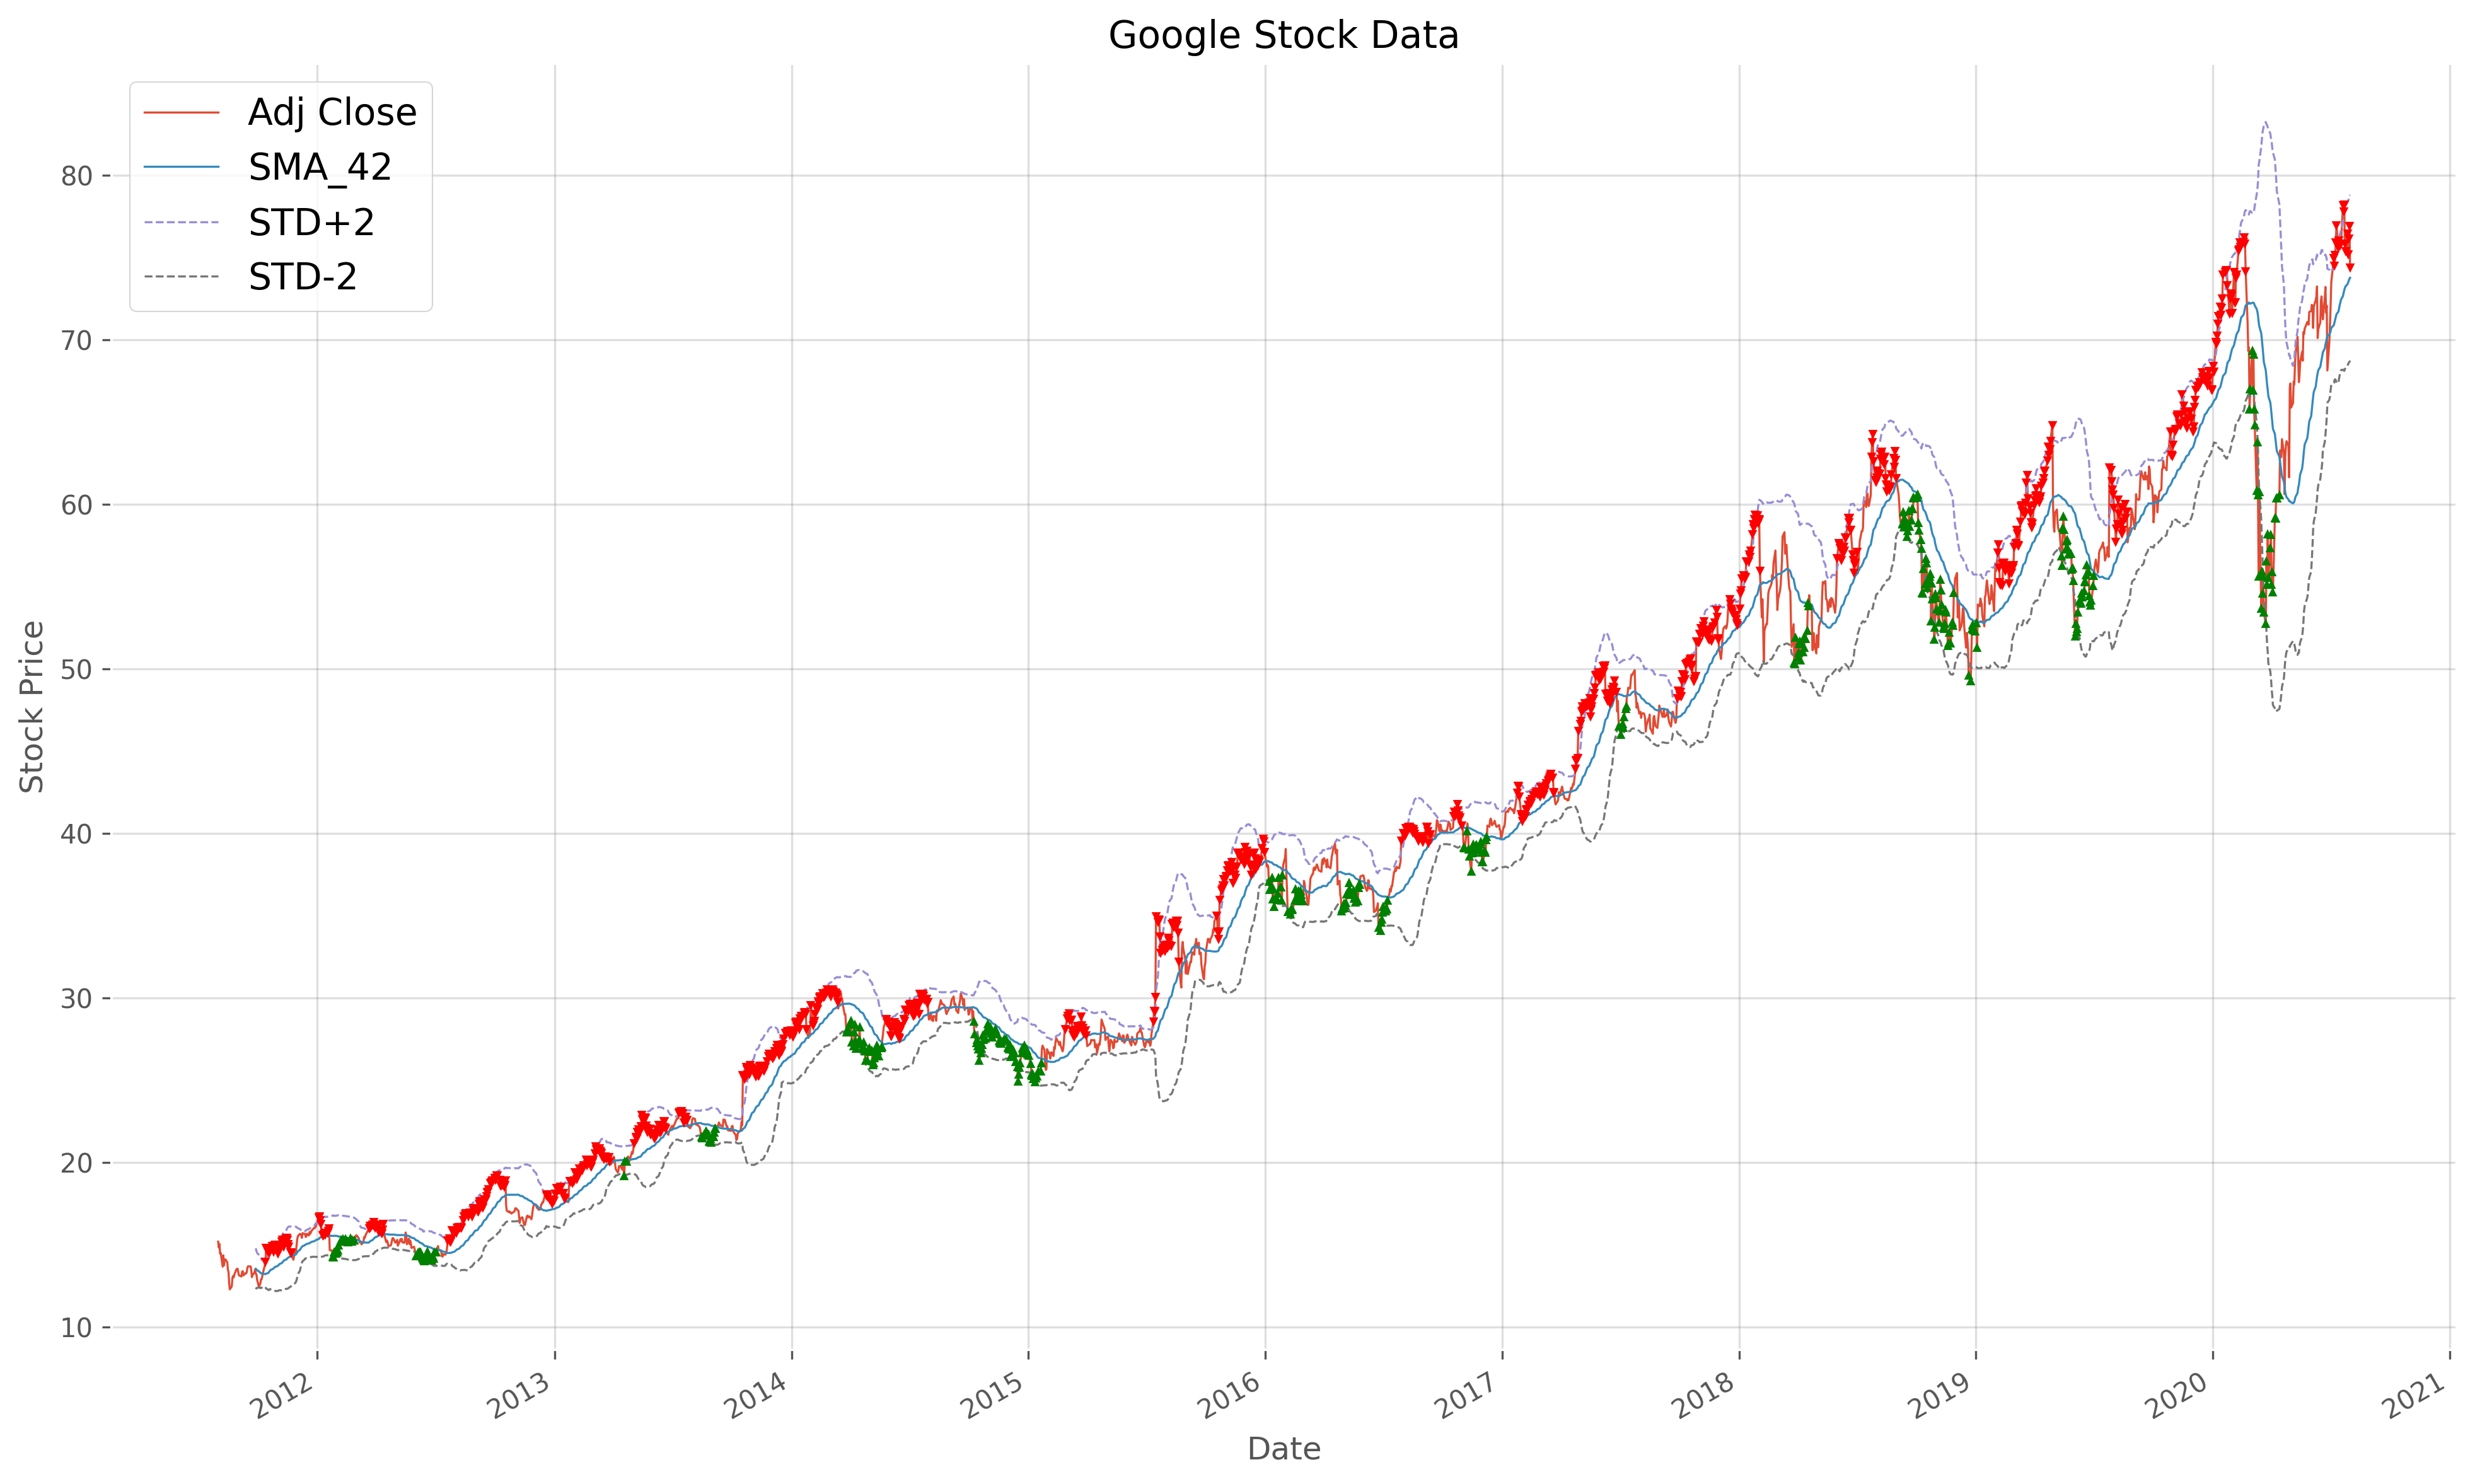

In [12]:
#Set the figure size
fig =\
    (plt
     .figure(figsize = [16, 10], 
             dpi=300
            )
    )

#Create subplot with 1 row and 1 col
sub =\
(    fig
    .add_subplot(111)
)

#Plot the GOOGL df
(
    GOOGL[['Adj Close',
       'SMA_42',
       'STD+2',
       'STD-2']]
        .plot(ax = sub,
             style = ['-','-','--','--'],
             lw = 0.8,
             title = 'Google Stock Data',
             ylabel = 'Stock Price')
)
#BUY Signal
(
    sub
    .plot(GOOGL.loc[GOOGL.POSITION == 1].index,
         GOOGL[GOOGL.POSITION == 1]['Adj Close'],
         'g^',
         markersize = 2)
)
#SELL Signal
(
    sub
    .plot(GOOGL.loc[GOOGL.POSITION == -1].index,
         GOOGL[GOOGL.POSITION == -1]['Adj Close'],
         'rv',
         markersize = 2)
)

plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [13]:
#Extract the data using yfinance
AAPL = \
    pdr.get_data_yahoo('AAPL',
                      start = start,
                      end = end)
AMZN = \
    pdr.get_data_yahoo('AMZN',
                      start = start,
                      end = end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [14]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,14.206429,14.267857,14.013214,14.169643,12.027144,612836000
2011-08-02,14.201786,14.210714,13.869643,13.889643,11.789479,639539600
2011-08-03,13.963571,14.055357,13.651429,14.020357,11.900428,732508000
2011-08-04,13.907500,13.975714,13.476786,13.477500,11.439654,871407600
2011-08-05,13.587143,13.696429,12.948929,13.343571,11.325976,1204590800
...,...,...,...,...,...,...
2020-07-27,93.709999,94.904999,93.480003,94.809998,92.959091,121214000
2020-07-28,94.367500,94.550003,93.247498,93.252502,91.432007,103625600
2020-07-29,93.750000,95.230003,93.712502,95.040001,93.184616,90329200


In [15]:
AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,11.250000,11.372500,10.883000,11.066000,11.066000,115786000
2011-08-02,11.016000,11.121500,10.565000,10.585000,10.585000,131734000
2011-08-03,10.648500,10.741500,10.277000,10.498000,10.498000,163942000
2011-08-04,10.336500,10.400000,10.072500,10.074000,10.074000,131590000
2011-08-05,10.233500,10.366000,9.742000,10.135000,10.135000,200480000
...,...,...,...,...,...,...
2020-07-27,153.100006,154.899994,150.788498,152.760498,152.760498,83410000
2020-07-28,152.713501,153.854507,149.787994,150.016495,150.016495,62534000
2020-07-29,151.549500,151.957993,149.838501,151.676498,151.676498,59482000


In [16]:
# Lets define a MeanReversion function - We pass three variables to function. Our extracted 
# dataframe, moving average window and threshold value.

In [17]:
def MeanReversion(dataframe,SMA,threshold):
    
    # We would want to remove the unwated columns from original df
    if all(col in dataframe.columns for col in ['Open', 'High', 'Low', 'Close', 'Volume']):
        dataframe = dataframe.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    
    #Calculate Simple Moving Average
    dataframe[f'SMA_{SMA}'] = \
            dataframe['Adj Close'] \
            .rolling(window=SMA) \
            .mean()

    #Create a Threshold 
    dataframe[f'STD+{threshold}'] = \
        dataframe[f'SMA_{SMA}'] + threshold*(dataframe['Adj Close'].rolling(SMA).std())

    dataframe[f'STD-{threshold}'] = \
            dataframe[f'SMA_{SMA}'] - threshold*(dataframe['Adj Close'].rolling(SMA).std())

    #Calculate the Distance
    dataframe['DISTANCE'] = \
        dataframe['Adj Close'] - dataframe[f'SMA_{SMA}']

    #Create the positions
    dataframe['POSITION'] = \
        np.where(dataframe['DISTANCE'] > (dataframe[f'STD+{threshold}'] - dataframe[f'SMA_{SMA}']),
                 -1, np.nan)

    dataframe['POSITION'] = \
        np.where(dataframe['DISTANCE'] < (dataframe[f'STD-{threshold}'] - dataframe[f'SMA_{SMA}']),
                 1, dataframe['POSITION'])

    dataframe['POSITION'] = \
        np.where(dataframe['DISTANCE'] * dataframe['DISTANCE'].shift(1) < 0,
                 0, dataframe['POSITION'])
    
    #forward fill the NaN Values
    dataframe['POSITION'] = \
        dataframe['POSITION'].ffill()
    
    dataframe['POSITION'] = \
        dataframe['POSITION'].fillna(0)
    
    #Calculate Returns
    dataframe['RETURN'] = \
        np.log(dataframe['Adj Close'] / dataframe['Adj Close'].shift(1))

    #Calculate Strategy Returns
    dataframe['STRATEGY'] = \
        dataframe['POSITION'].shift(1) * dataframe['RETURN']

    return dataframe

In [18]:
APPLE = \
    MeanReversion(AAPL, 42, 2)

In [19]:
APPLE

,Adj Close,SMA_42,STD+2,STD-2,DISTANCE,POSITION,RETURN,STRATEGY
Date,,,,,,,,
2011-08-01,12.027144,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2011-08-02,11.789479,NaN,NaN,NaN,NaN,0.0,-0.019959,-0.000000
2011-08-03,11.900428,NaN,NaN,NaN,NaN,0.0,0.009367,0.000000
2011-08-04,11.439654,NaN,NaN,NaN,NaN,0.0,-0.039489,-0.000000
2011-08-05,11.325976,NaN,NaN,NaN,NaN,0.0,-0.009987,-0.000000
...,...,...,...,...,...,...,...,...
2020-07-27,92.959091,88.072518,99.261250,76.883786,4.886574,-1.0,0.023424,-0.023424
2020-07-28,91.432007,88.392107,99.161990,77.622224,3.039900,-1.0,-0.016564,0.016564
2020-07-29,93.184616,88.755234,99.100230,78.410239,4.429382,-1.0,0.018987,-0.018987


In [20]:
AMAZON = \
    MeanReversion(AMZN, 42, 2)

In [21]:
AMAZON

,Adj Close,SMA_42,STD+2,STD-2,DISTANCE,POSITION,RETURN,STRATEGY
Date,,,,,,,,
2011-08-01,11.066000,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2011-08-02,10.585000,NaN,NaN,NaN,NaN,0.0,-0.044439,-0.000000
2011-08-03,10.498000,NaN,NaN,NaN,NaN,0.0,-0.008253,-0.000000
2011-08-04,10.074000,NaN,NaN,NaN,NaN,0.0,-0.041227,-0.000000
2011-08-05,10.135000,NaN,NaN,NaN,NaN,0.0,0.006037,0.000000
...,...,...,...,...,...,...,...,...
2020-07-27,152.760498,139.614071,164.634205,114.593936,13.146427,-1.0,0.015270,-0.015270
2020-07-28,150.016495,140.327440,164.764222,115.890657,9.689055,-1.0,-0.018126,0.018126
2020-07-29,151.676498,141.031201,165.017552,117.044851,10.645297,-1.0,0.011005,-0.011005


In [22]:
# Calculate sharpe ratio

$$ Sharpe Ratio = \sqrt 253 \times \frac {\text{Average Daily Returns}} {\text{Daily Standard Deviation}} $$

In [23]:
Sharpe_AAPL = \
(
    np.sqrt(253) * (APPLE['STRATEGY'].mean() / APPLE['STRATEGY'].std()
                    )
)
Sharpe_AAPL

-0.4093376664994686

In [24]:
Sharpe_AMZN = \
(
    np.sqrt(253) * (AMAZON['STRATEGY'].mean() / AMAZON['STRATEGY'].std()
                    )
)
Sharpe_AMZN

-0.2769079669227772

### <font color = red> Answer 2 </font>

    The answer is APPLE = -0.40933 and AMAZON = -0.27690.

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [25]:
# Lets define a function to calculate the cash return. Here we will calculate the cummulative 
# returns of our strategy over the period and multiply with our initial capital.

# We are passing two variables to the function, Our Dataframe and initial capital

In [26]:
def CalculateCashReturn(dataframe,capital):
    
    #Calculate cummulative return --> only for our comparison with strategy returns
    dataframe['CUMULATIVE RETURN'] = \
        dataframe['RETURN'].cumsum().apply(np.exp)
    
    #Calculate cummulative strategy return
    dataframe['CUMULATIVE STRATEGY'] = \
        dataframe['STRATEGY'].cumsum().apply(np.exp)
    
    #Final cash return
    capital = \
        capital * dataframe['CUMULATIVE STRATEGY'][-1]

    return capital

In [27]:
capital = 2e5

In [28]:
# We will call MeanReversion function on Google df since we haven't calculated return and 
# strategy return for GOOGLE

In [29]:
GOOGL = \
    MeanReversion(GOOG, 42, 2)

In [30]:
# Call the cash return function

In [31]:
GOOGL_Cash = CalculateCashReturn(GOOGL,capital)

In [32]:
APPLE_Cash = CalculateCashReturn(APPLE,capital)

In [33]:
AMAZON_Cash = CalculateCashReturn(AMAZON,capital)

In [34]:
GOOGL_Cash

231686.7981242213

In [35]:
APPLE_Cash

85535.03361314256

In [36]:
AMAZON_Cash

112025.82212371375

### <font color = red> Answer 3 </font>

    GOOGL : 231686.79
    
    AAPL  : 85535.01 
     
    AMZN  : 112025.82 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [37]:
# Lets define CalculateCAGR Function with two variables i.e our dataframe and final capital

$$
\text{CAGR} = \left( \frac{\text{End Value}}{\text{Start Value}} \right)^{\frac{365}{\text{Total Days}}} - 1
$$

In [38]:
def CalculateCAGR(dataframe, final_Cash):
    
    # Drop Nan Values to avoid unnessesary day values
    dataframe = \
        dataframe.dropna()
    
    # Calculate days between Start and End date of our df
    days = \
        (
            (dataframe.index[-1] - dataframe.index[0])
            .days
        )
    
    # Calculate CAGR
    CAGR =\
        (
            (
              (
                (final_Cash) / capital
              )
                **(365.0/days) 
            ) 
            - 1
        )
    
    return round(CAGR*100,2)

In [39]:
CalculateCAGR(APPLE, APPLE_Cash)

-9.15

In [40]:
CalculateCAGR(GOOGL, GOOGL_Cash)

1.68

In [41]:
CalculateCAGR(AMAZON, AMAZON_Cash)

-6.34

### <font color = red> Answer 4 </font>

    GOOGL : 1.68
    
    AAPL  : -9.15
     
    AMZN  : -6.34 

## 👇 Questions 5 and 7 ask you to predict future market direction. Let's analyze `GE`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

In [42]:
GE = \
(
    pdr.get_data_yahoo('GE',
                      start,
                      end)
)

[*********************100%%**********************]  1 of 1 completed


In [43]:
GE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,110.430550,110.610703,106.167053,107.908485,82.597839,11507323
2011-08-02,106.527351,107.368042,103.044495,103.344742,79.104561,16131744
2011-08-03,103.584938,105.086174,102.444000,104.906021,80.299614,14350540
2011-08-04,103.224648,103.705040,98.600853,98.901100,75.703201,21335241
2011-08-05,100.042030,101.783463,96.679276,99.141296,75.887039,20699063
...,...,...,...,...,...,...
2020-07-27,42.716629,42.779079,41.779858,41.904762,41.388199,11321478
2020-07-28,41.842312,43.466042,41.779858,43.028885,42.498466,12174880
2020-07-29,43.653397,43.715847,40.718189,41.155346,40.648029,23769339


In [44]:
GE['RETURN'] = \
    np.log(GE['Adj Close']/GE['Adj Close'].shift(1))

In [45]:
GE

,Open,High,Low,Close,Adj Close,Volume,RETURN
Date,,,,,,,
2011-08-01,110.430550,110.610703,106.167053,107.908485,82.597839,11507323,NaN
2011-08-02,106.527351,107.368042,103.044495,103.344742,79.104561,16131744,-0.043213
2011-08-03,103.584938,105.086174,102.444000,104.906021,80.299614,14350540,0.014994
2011-08-04,103.224648,103.705040,98.600853,98.901100,75.703201,21335241,-0.058944
2011-08-05,100.042030,101.783463,96.679276,99.141296,75.887039,20699063,0.002425
...,...,...,...,...,...,...,...
2020-07-27,42.716629,42.779079,41.779858,41.904762,41.388199,11321478,-0.022108
2020-07-28,41.842312,43.466042,41.779858,43.028885,42.498466,12174880,0.026472
2020-07-29,43.653397,43.715847,40.718189,41.155346,40.648029,23769339,-0.044518


In [46]:
# Lets define a function to create the lags. We pass in two values, our dataframe and number of
# lags we want.

In [47]:
def CreateLags(dataframe, LAGS):
    #Empty List to store column names
    COLS = []
    
    #Empty Dataframe
    lag_df = \
        pd.DataFrame(index = dataframe.index)
    
    #Fetch Returns from original df
    lag_df['RETURN'] = \
        dataframe['RETURN']
    
    #Create lags
    for i in range(1,LAGS+1):
        COL = f'Lag_{i}'
        
        lag_df[COL] = \
            lag_df['RETURN'].shift(i)
        
        COLS.append(COL)
        
    return lag_df.dropna(), COLS

In [48]:
# Lets define a OLSRegression function to run a regression on a data and append the results to the
# origianl dataframe

In [49]:
def OLSRegression(dataframe,columns):
    
    # Regress 
    OLS =\
        np \
        .linalg \
        .lstsq(dataframe[columns],  
               dataframe["RETURN"],
               rcond = None)[0]
    
    # Calculate the prediction by taking dot product with coefficients
    dataframe["PREDICTION"] =\
        np.dot(dataframe[columns], 
               OLS)
    return dataframe

In [50]:
# 3 Lags

In [51]:
GE_LAG_3, COLS_3 = CreateLags(GE, 3)

In [52]:
GE_LAG_3.head()

,RETURN,Lag_1,Lag_2,Lag_3
Date,,,,
2011-08-05,0.002425,-0.058944,0.014994,-0.043213
2011-08-08,-0.067652,0.002425,-0.058944,0.014994
2011-08-09,0.033772,-0.067652,0.002425,-0.058944
2011-08-10,-0.056054,0.033772,-0.067652,0.002425
2011-08-11,0.038354,-0.056054,0.033772,-0.067652


In [53]:
GE_LAG_3 = \
    OLSRegression(GE_LAG_3,COLS_3)

In [54]:
# 10 Lags

In [55]:
GE_LAG_10, COLS_10 = CreateLags(GE, 10)

In [56]:
GE_LAG_10.head()

,RETURN,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
Date,,,,,,,,,,,
2011-08-16,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425,-0.058944,0.014994,-0.043213
2011-08-17,0.004941,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425,-0.058944,0.014994
2011-08-18,-0.056398,0.004941,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425,-0.058944
2011-08-19,-0.016432,-0.056398,0.004941,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425
2011-08-22,0.001325,-0.016432,-0.056398,0.004941,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652


In [57]:
GE_LAG_10 = \
    OLSRegression(GE_LAG_10,COLS_10)

In [58]:
# 22 Lags

In [59]:
GE_LAG_22, COLS_22 = CreateLags(GE, 22)

In [60]:
GE_LAG_22.head()

,RETURN,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,...,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17,Lag_18,Lag_19,Lag_20,Lag_21,Lag_22
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,-0.006767,0.011718,0.004975,0.031668,0.005808,-0.017325,0.011517,0.028060,0.001325,-0.016432,...,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425,-0.058944,0.014994,-0.043213
2011-09-02,-0.027536,-0.006767,0.011718,0.004975,0.031668,0.005808,-0.017325,0.011517,0.028060,0.001325,...,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425,-0.058944,0.014994
2011-09-06,-0.032895,-0.027536,-0.006767,0.011718,0.004975,0.031668,0.005808,-0.017325,0.011517,0.028060,...,0.004941,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425,-0.058944
2011-09-07,0.035431,-0.032895,-0.027536,-0.006767,0.011718,0.004975,0.031668,0.005808,-0.017325,0.011517,...,-0.056398,0.004941,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652,0.002425
2011-09-08,-0.013380,0.035431,-0.032895,-0.027536,-0.006767,0.011718,0.004975,0.031668,0.005808,-0.017325,...,-0.016432,-0.056398,0.004941,-0.014751,0.031611,0.012674,0.038354,-0.056054,0.033772,-0.067652


In [61]:
GE_LAG_22 = \
    OLSRegression(GE_LAG_22,COLS_22)

### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

In [62]:
# Now we will plot out predictions

<Axes: title={'center': 'LAG_3'}, xlabel='Date'>

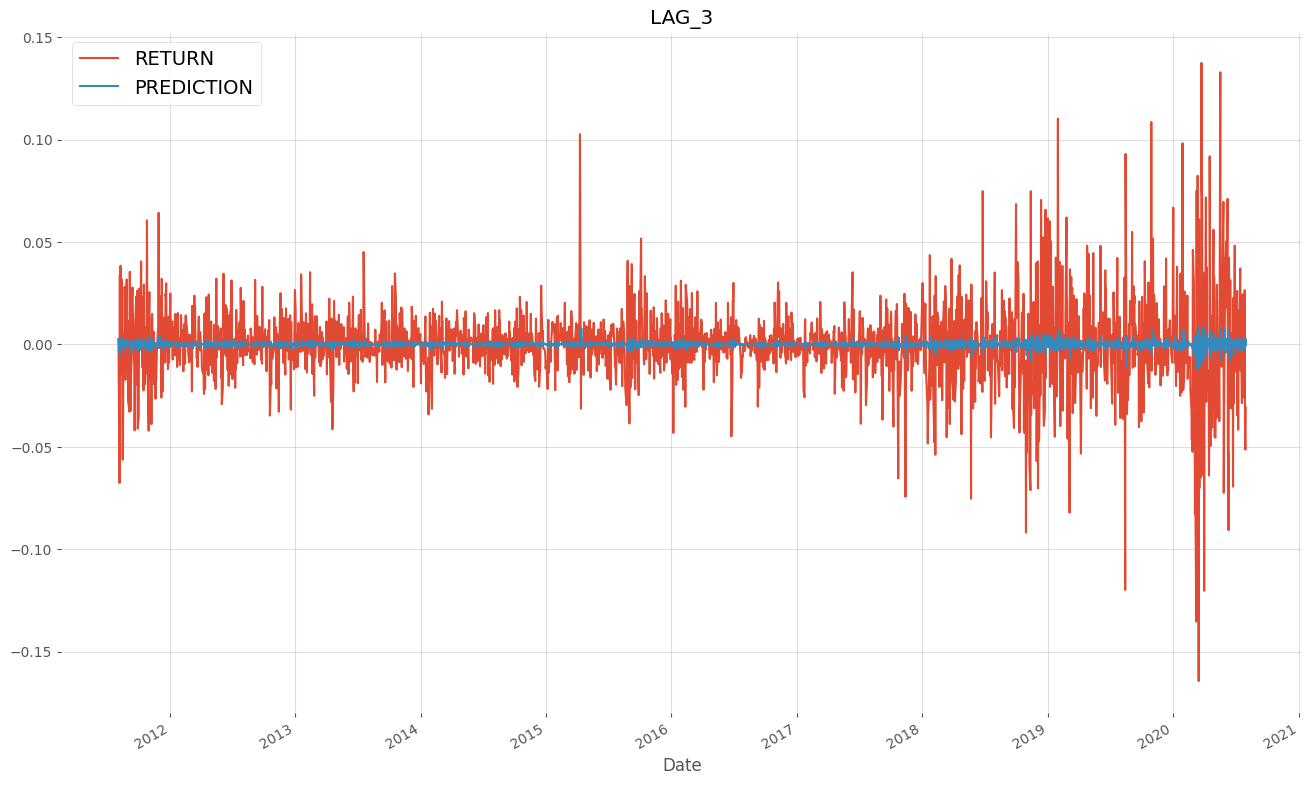

In [63]:
(
    GE_LAG_3[['RETURN','PREDICTION']].
    plot(figsize=[16,10],
        title = 'LAG_3')
)

<Axes: title={'center': 'LAG_10'}, xlabel='Date'>

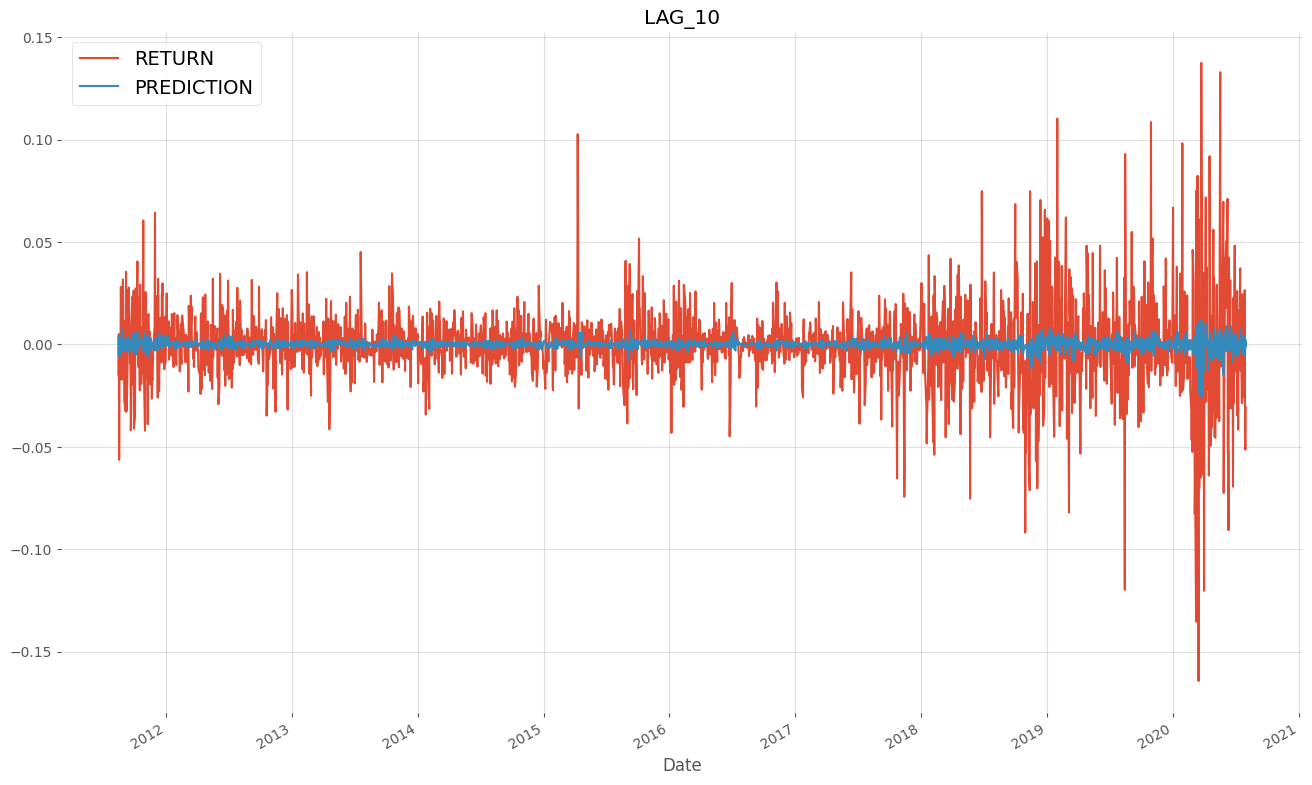

In [64]:
(
    GE_LAG_10[['RETURN','PREDICTION']].
    plot(figsize=[16,10],
        title = 'LAG_10')
)

<Axes: title={'center': 'LAG_22'}, xlabel='Date'>

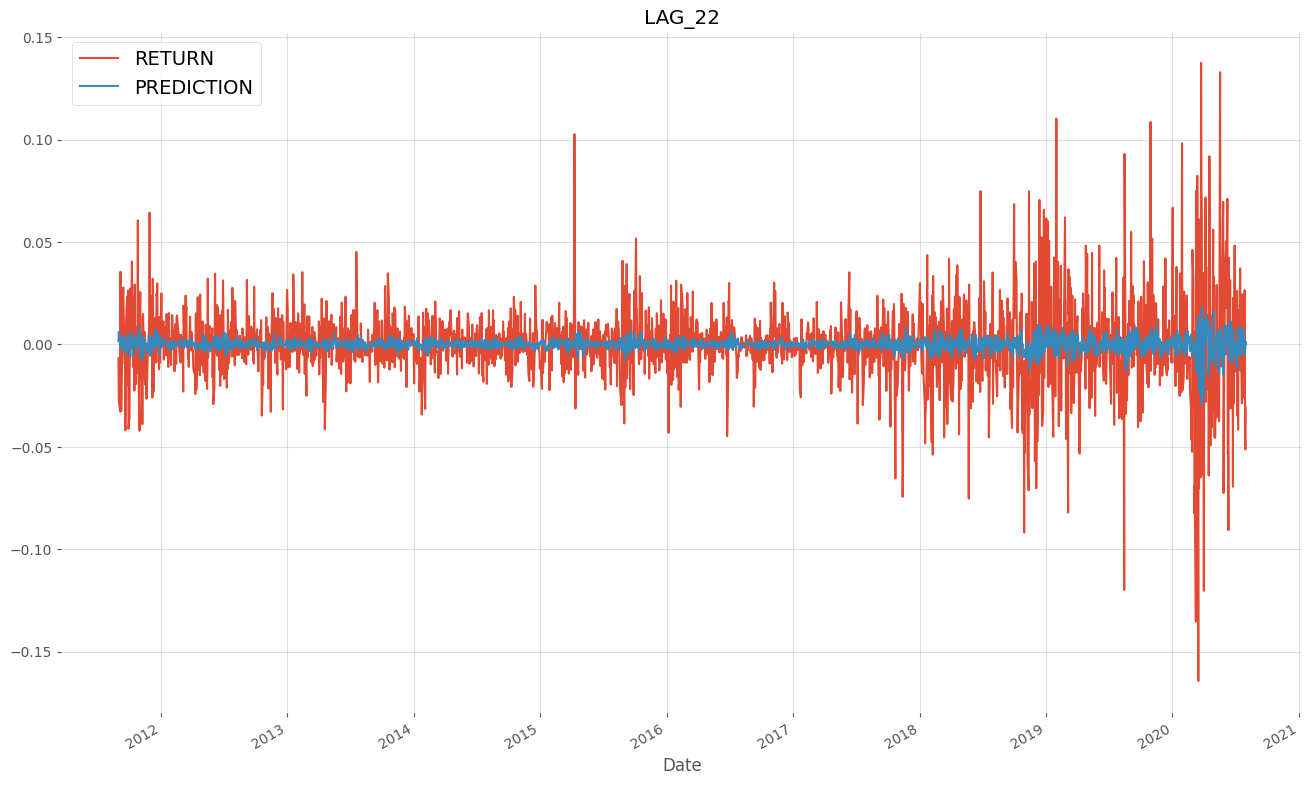

In [65]:
(
    GE_LAG_22[['RETURN','PREDICTION']].
    plot(figsize=[16,10],
        title = 'LAG_22')
)

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In our class, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [66]:
def calculate_accuracy_A(returns, predictions, tolerance):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [67]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B

### Below are the lines of code that lead to an answer:

### **Evaluation of Function calculate_accuracy_A**

#### Pros
- When returns != 0, the ability to choose a tolerance level for a prediction to be considered a valid prediction provides a lot of flexibility. For example, most of us would agree that a prediction of +0.01% on a realised return of -0.01% would be considered a good prediction. However, this would not be captured as a valid prediction in Function calculate_accuracy_B, where only the sign matters.

#### Cons
- However, this additional flexibility is also a double-edged sword, as the question arises of what tolerance level to choose, as this decision can significantly impact the outcome of what constitutes a valid prediction and consequently the calculation of the prediction accuracy.
####
- When returns == 0, predictions == 0 does not constitute a valid prediction, which does not make sense.
####

- For instance, when using a lag of 3 days to predict returns, it is technically possible to get a prediction == 0 when returns == 0 for 3 consecutive days, which makes $Lag_1$, $Lag_2$, and $Lag_3$ equal to 0. As the likelihood of this happening is extremely low, this is why we do not actually get a prediction == 0 in our strategy. Only thing that comes to mind is when a stock has no trading volume for the past 3 days, hence 0% returns.

$$ \hat{R} =  \hat{\beta}_{1} Lag_{1} + \hat{\beta}_{2} Lag_{2} + \hat{\beta}_{3} Lag_{3} $$

####
- Moreover, in the first (if) condition, when returns == 0, predictions != 0 also constitutes a valid prediction. This does not make sense, and only serves to inflate the percentage of valid predictions.


### **Evaluation of Function calculate_accuracy_B**

#### Pros
- As this function only cares about whether the sign of the returns and predictions match, this provides room for error as a prediction of +0.5% on a realised return of +0.4% would still constitute a valid prediction.
####
- When returns == 0 and returns != 0, predictions == 0 and predictions != 0 respectively accurately reflects a valid prediction, unlike in Function calculate_accuracy_A.

#### Cons
- As mentioned above in comparison to Function calculate_accuracy_A, while most of us would agree that a prediction of +0.01% on a realised return of -0.01% would be considered a good prediction, this would not be considered a valid prediction in this function.


### **As the percentage of valid predictions is unnecessarily inflated in Function calculate_accuracy_A, we feel that this makes it a bias estimator and hence prefer Function calculate_accuracy_B for assessing the accuracy of predictions.**

In [68]:
def calculate_accuracy_A_evaluation_uncorrected(returns, predictions):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < 0.01:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [69]:
# Evaluating calculate_accuracy_A function, using a 1% tolerance level.
# if returns[i] == 0 and predictions[i] != 0:
#             valid_predictions += 1

# We observe an inflated percentage of valid predictions.

calculate_accuracy_A_evaluation_uncorrected(GE_LAG_22['RETURN'], GE_LAG_22['PREDICTION'])

0.582255907267053

In [70]:
def calculate_accuracy_A_evaluation_corrected(returns, predictions):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] == 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < 0.01:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [71]:
# Evaluating corrected calculate_accuracy_A function, using a 1% tolerance level.
# if returns[i] == 0 and predictions[i] == 0:
#             valid_predictions += 1

# We observe that the percentage of valid predictions falls slightly.

calculate_accuracy_A_evaluation_corrected(GE_LAG_22['RETURN'], GE_LAG_22['PREDICTION'])

0.56531431119037

In [72]:
def calculate_accuracy_B_revised(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)

    return total_correct, total_incorrect, round(accuracy_B*100, 4)

In [73]:
def getAccuracy(dataframe):
    
    for df in dataframe:
        correct, incorrect, accuracy = \
                    calculate_accuracy_B_revised(df['RETURN'], df['PREDICTION'])
        
        lag = \
            df.columns.size - 2
        
        print(f'The prediction is {correct} times correct and {incorrect} wrong. The accuracy is {accuracy}% with a {lag}-day lag.\n')

In [74]:
dfs = [GE_LAG_3,GE_LAG_10,GE_LAG_22]

### <font color = red> Answer 6 </font>

In [75]:
getAccuracy(dfs)

The prediction is 1136 times correct and 1126 wrong. The accuracy is 50.221% with a 3-day lag.

The prediction is 1136 times correct and 1119 wrong. The accuracy is 50.3769% with a 10-day lag.

The prediction is 1134 times correct and 1109 wrong. The accuracy is 50.5573% with a 22-day lag.



###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [76]:
# We need to calculate Strategy return using our predictions

In [77]:
# So we will use our predictions to decide the market direction and based on that we will calculate
# the strategy returns

In [78]:
GE_LAG_3['DIRECTION'] = \
    np.sign(GE_LAG_3['PREDICTION'])
GE_LAG_3['STRATEGY'] = \
    GE_LAG_3['DIRECTION'] * GE_LAG_3['RETURN']

In [79]:
GE_LAG_10['DIRECTION'] = \
    np.sign(GE_LAG_10['PREDICTION'])
GE_LAG_10['STRATEGY'] = \
    GE_LAG_10['DIRECTION'] * GE_LAG_10['RETURN']

In [80]:
GE_LAG_22['DIRECTION'] = \
    np.sign(GE_LAG_22['PREDICTION'])
GE_LAG_22['STRATEGY'] = \
    GE_LAG_22['DIRECTION'] * GE_LAG_22['RETURN']

In [81]:
def getSharpe(dataframe):
    for df in dataframe:
        Sharpe = \
            (
                round(np.sqrt(252) * (df['STRATEGY'].mean() / df['STRATEGY'].std()),3)
            )
        lag = \
            df.columns.size - 4
        
        print(f'The strategy for GE with a {lag}-day lag leads to a Sharpe ratio of {Sharpe}.\n')

In [82]:
dfs = [GE_LAG_3,GE_LAG_10,GE_LAG_22]

### <font color = red> Answer 7 </font>

In [83]:
getSharpe(dfs)

The strategy for GE with a 3-day lag leads to a Sharpe ratio of 0.157.

The strategy for GE with a 10-day lag leads to a Sharpe ratio of 0.299.

The strategy for GE with a 22-day lag leads to a Sharpe ratio of 0.665.



## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [84]:
GS = \
(
    pdr.get_data_yahoo('GS',
                      start=dt.datetime(2013,11,1),
                      end=dt.datetime(2021,11,1))
)
JPM = \
(
    pdr.get_data_yahoo('JPM',
                      start=dt.datetime(2013,11,1),
                      end=dt.datetime(2021,11,1))
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [85]:
#Goldman Sachs BUY_SELL Signal

In [86]:
# Create Empty Dataframe
BUY_SELL_GS = \
    pd.DataFrame(index = GS.index)

In [87]:
BUY_SELL_GS['BUY_SELL'] = 0

In [88]:
#SHORT SMA
BUY_SELL_GS['SHORT_SMA'] = \
(
    GS['Adj Close']
    .rolling(window=24)
    .mean()
)

#LONG SMA
BUY_SELL_GS['LONG_SMA'] = \
(
    GS['Adj Close']
    .rolling(window=58)
    .mean()
)

In [89]:
# Calculate the Buy and Sell positions

In [90]:
BUY_SELL_GS['BUY_SELL'] = \
(
    np.where(BUY_SELL_GS['SHORT_SMA'] > BUY_SELL_GS['LONG_SMA'], 1, 0)
)

In [91]:
# Take the difference and assign to Position column

In [92]:
BUY_SELL_GS['POSITION'] = \
(
    BUY_SELL_GS['BUY_SELL'].diff()
)

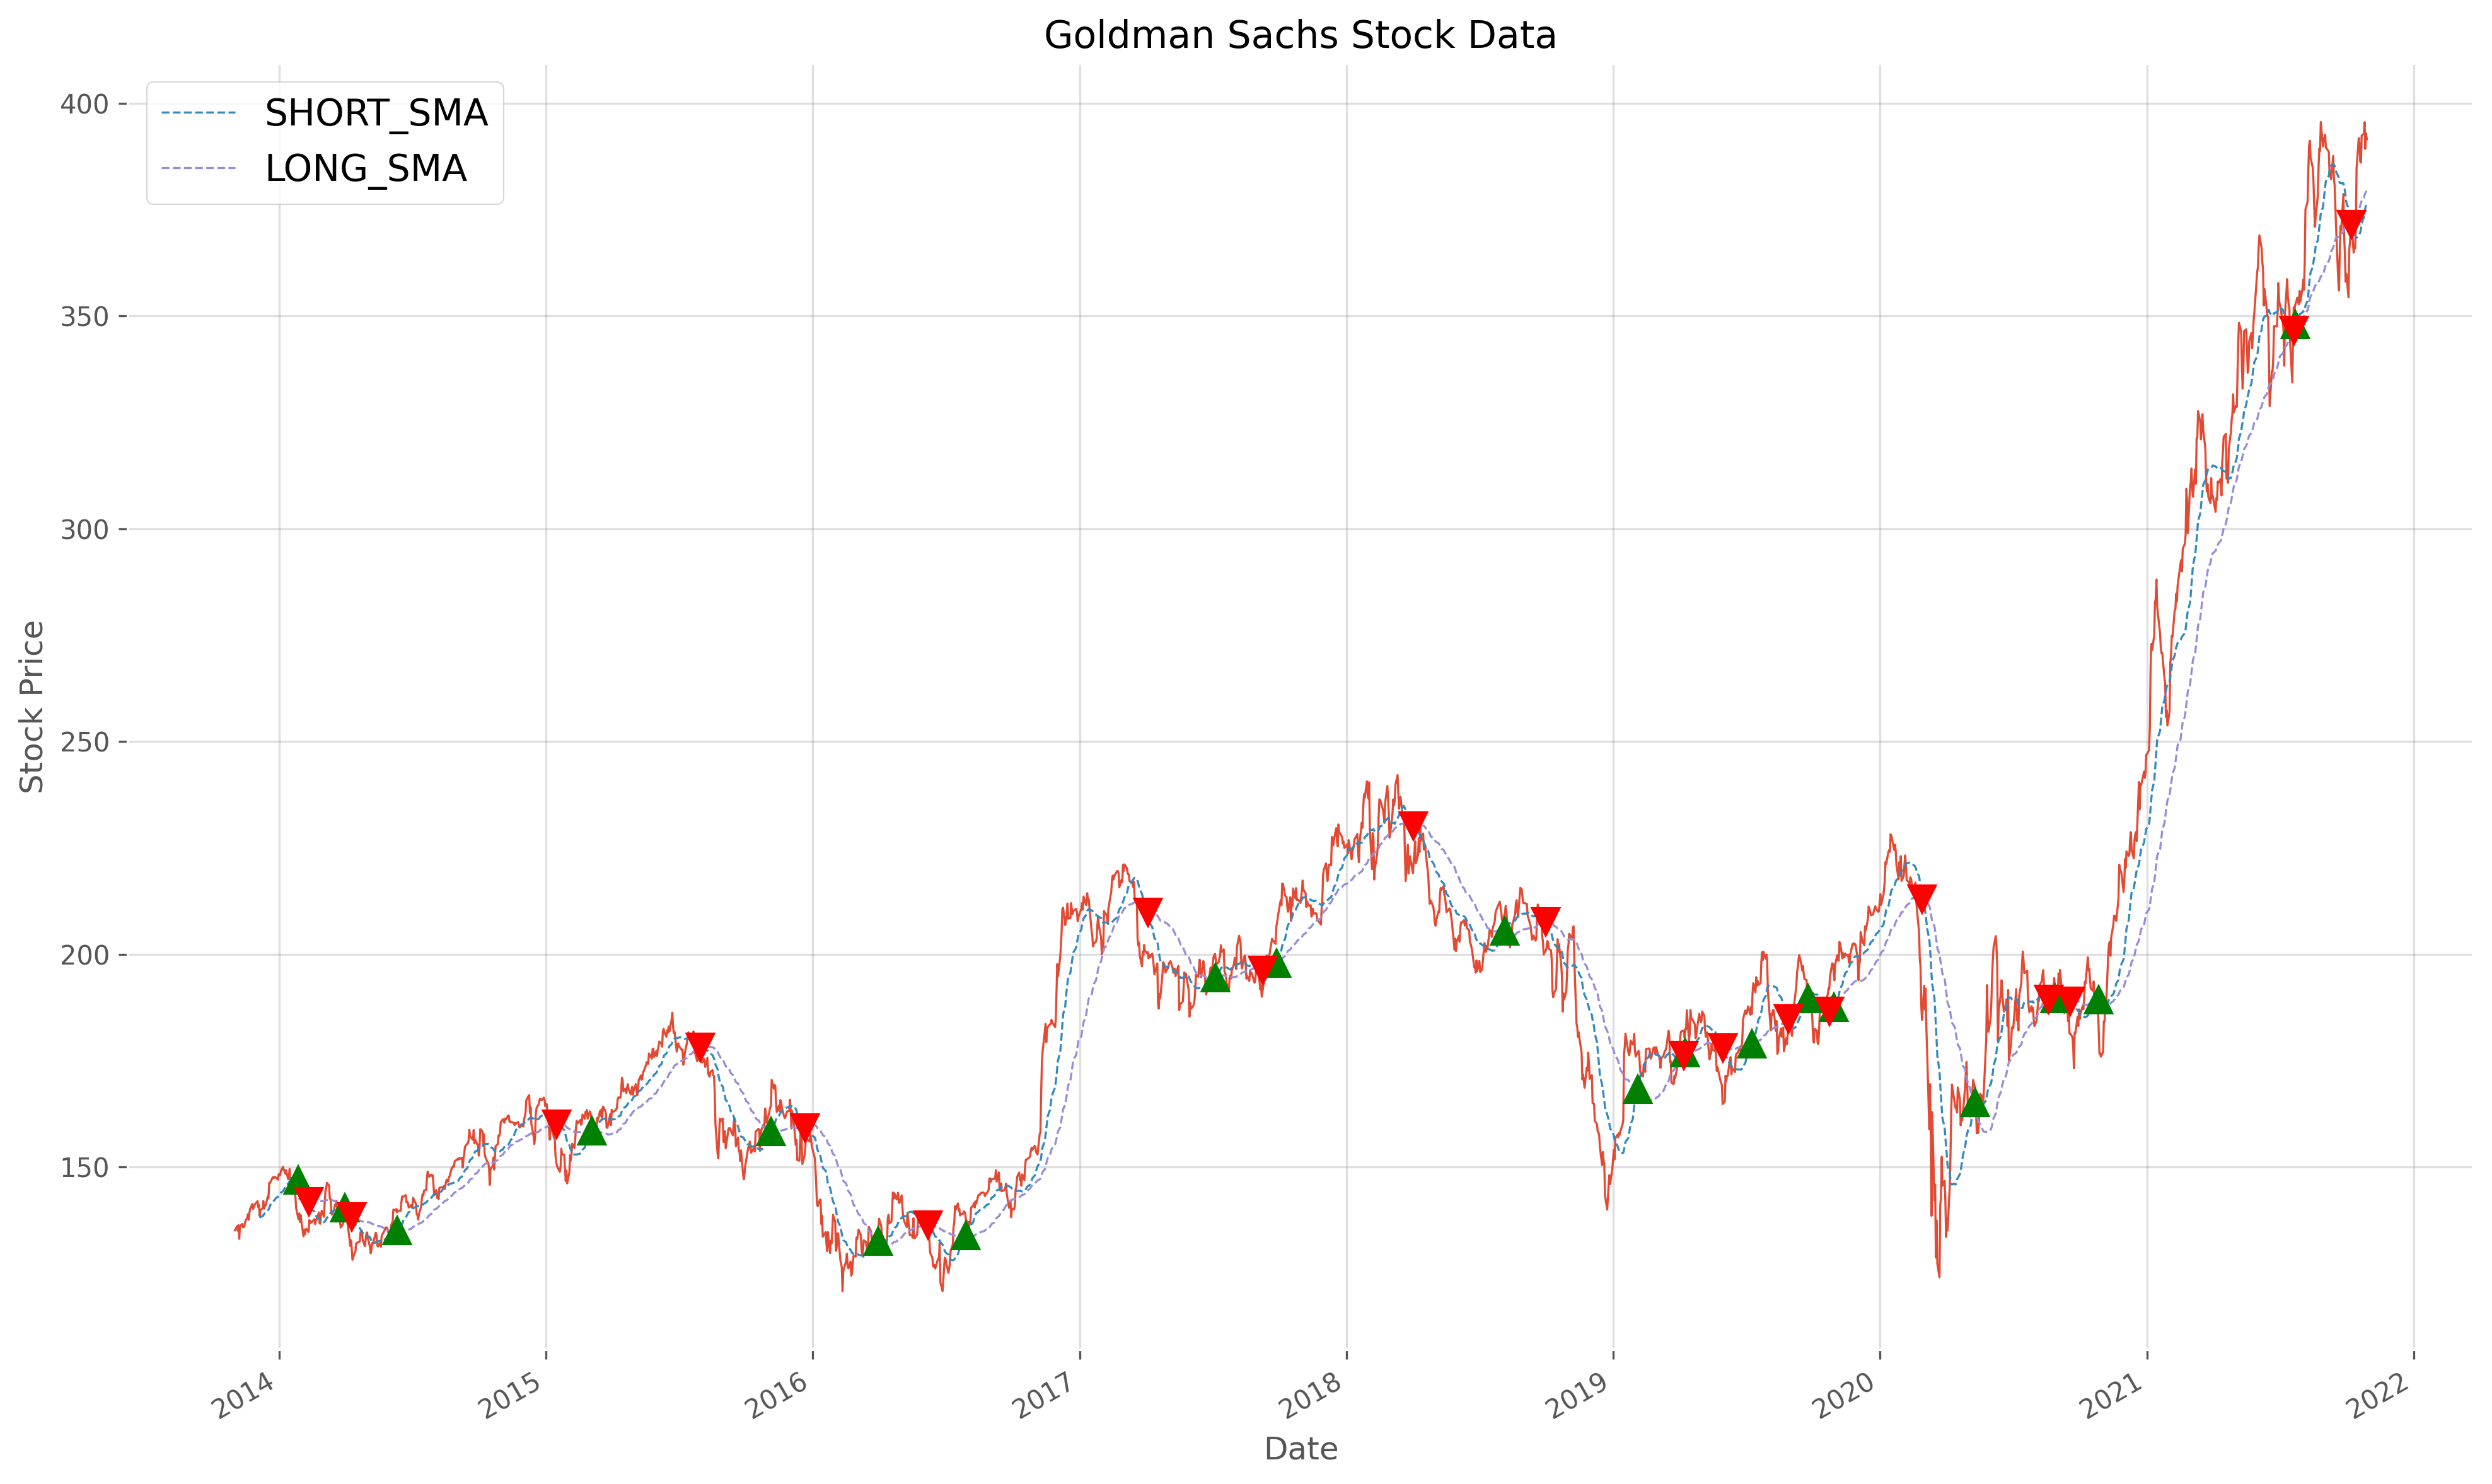

In [93]:
fig =\
    (plt
     .figure(figsize = [16, 10],
             dpi = 300
            )
    )

sub =\
(    fig
    .add_subplot(111,
                 ylabel = "Stock Price")
)

(
    GS['Adj Close']
    .plot(ax=sub,
         lw = 0.8,
         title = 'Goldman Sachs Stock Data')
)

(
    BUY_SELL_GS[['SHORT_SMA',
                'LONG_SMA']]
    .plot(ax=sub,
         style=['--','--'],
         lw=0.8)
)

#BUY
(
    sub
    .plot(BUY_SELL_GS.loc[BUY_SELL_GS.POSITION == 1.0].index,
          BUY_SELL_GS.SHORT_SMA[BUY_SELL_GS.POSITION == 1.0],
          "^",
          color = "green",
          markersize = 10)

)

# Sell

(
    sub
    .plot(BUY_SELL_GS.loc[BUY_SELL_GS.POSITION == -1.0].index,
          BUY_SELL_GS.SHORT_SMA[BUY_SELL_GS.POSITION == -1.0],
          "v",
          color = "red",
          markersize = 10)
)

plt.show()

In [94]:
#JP Morgan BUY_SELL Signal

In [95]:
BUY_SELL_JPM = \
    pd.DataFrame(index = JPM.index)

BUY_SELL_JPM['BUY_SELL'] = 0

#SHORT SMA
BUY_SELL_JPM['SHORT_SMA'] = \
(
    JPM['Adj Close']
    .rolling(window=24)
    .mean()
)

#LONG SMA
BUY_SELL_JPM['LONG_SMA'] = \
(
    JPM['Adj Close']
    .rolling(window=58)
    .mean()
)

BUY_SELL_JPM['BUY_SELL'] = \
(
    np.where(BUY_SELL_JPM['SHORT_SMA'] > BUY_SELL_JPM['LONG_SMA'], 1, 0)
)

BUY_SELL_JPM['POSITION'] = \
(
    BUY_SELL_JPM['BUY_SELL'].diff()
)

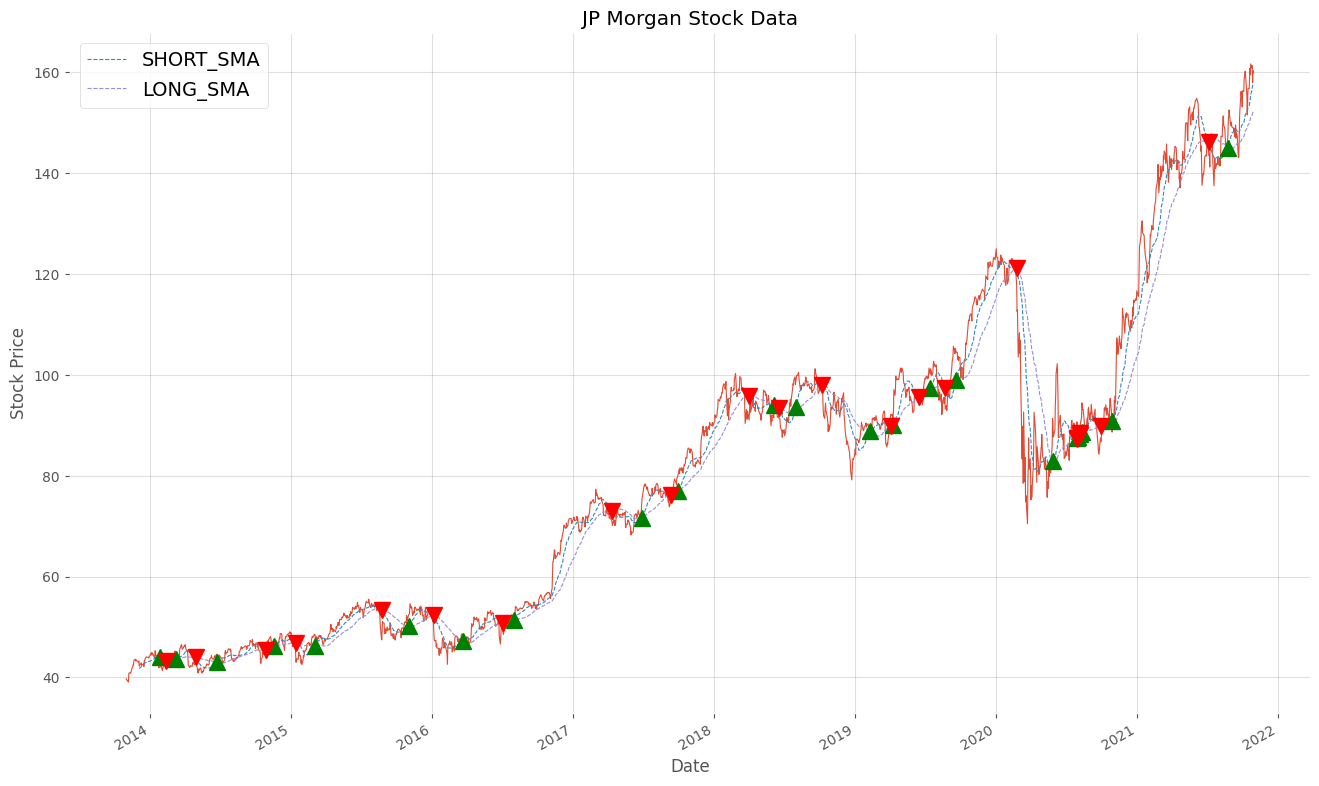

In [96]:
fig =\
    (plt
     .figure(figsize = [16, 10]
            )
    )

sub =\
(    fig
    .add_subplot(111,
                 ylabel = "Stock Price",
                title = 'JP Morgan Stock Data')
)

(
    JPM['Adj Close']
    .plot(ax=sub,
         lw = 0.8)
)

(
    BUY_SELL_JPM[['SHORT_SMA',
                'LONG_SMA']]
    .plot(ax=sub,
         style=['--','--'],
         lw=0.8)
)

#BUY
(
    sub
    .plot(BUY_SELL_JPM.loc[BUY_SELL_JPM.POSITION == 1.0].index,
          BUY_SELL_JPM.SHORT_SMA[BUY_SELL_JPM.POSITION == 1.0],
          "^",
          color = "green",
          markersize = 12)

)

# Sell

(
    sub
    .plot(BUY_SELL_JPM.loc[BUY_SELL_JPM.POSITION == -1.0].index,
          BUY_SELL_JPM.SHORT_SMA[BUY_SELL_JPM.POSITION == -1.0],
          "v",
          color = "red",
          markersize = 12)
)

plt.show()

In [97]:
# Goldman Sachs Drawdown

In [98]:
BUY_SELL_GS = \
    BUY_SELL_GS.dropna()

BUY_SELL_GS['BUYSELL'] = \
    (
    np.where(BUY_SELL_GS['SHORT_SMA'] > BUY_SELL_GS['LONG_SMA'], 1, -1)
    )

# Calculate Returns
BUY_SELL_GS['LOG_RETURN'] = \
    np.log(GS['Adj Close'] / GS['Adj Close'].shift(1))

# Calculate Strategy Returns
BUY_SELL_GS['STRATEGY_RETURN'] = \
    BUY_SELL_GS['BUYSELL'].shift(1) * BUY_SELL_GS['LOG_RETURN']

# Calculate Cummulative Returns
BUY_SELL_GS['CUMMULATIVE_RETURN'] = \
    BUY_SELL_GS['STRATEGY_RETURN'].cumsum().apply(np.exp)

# Calculate Max Cummulative Returns
BUY_SELL_GS['MAX_GROSS'] = \
    BUY_SELL_GS['CUMMULATIVE_RETURN'].cummax()

### <font color = red> Answer 8 (`visualization component of GS`) is presented in the cell below: </font>

<Axes: xlabel='Date'>

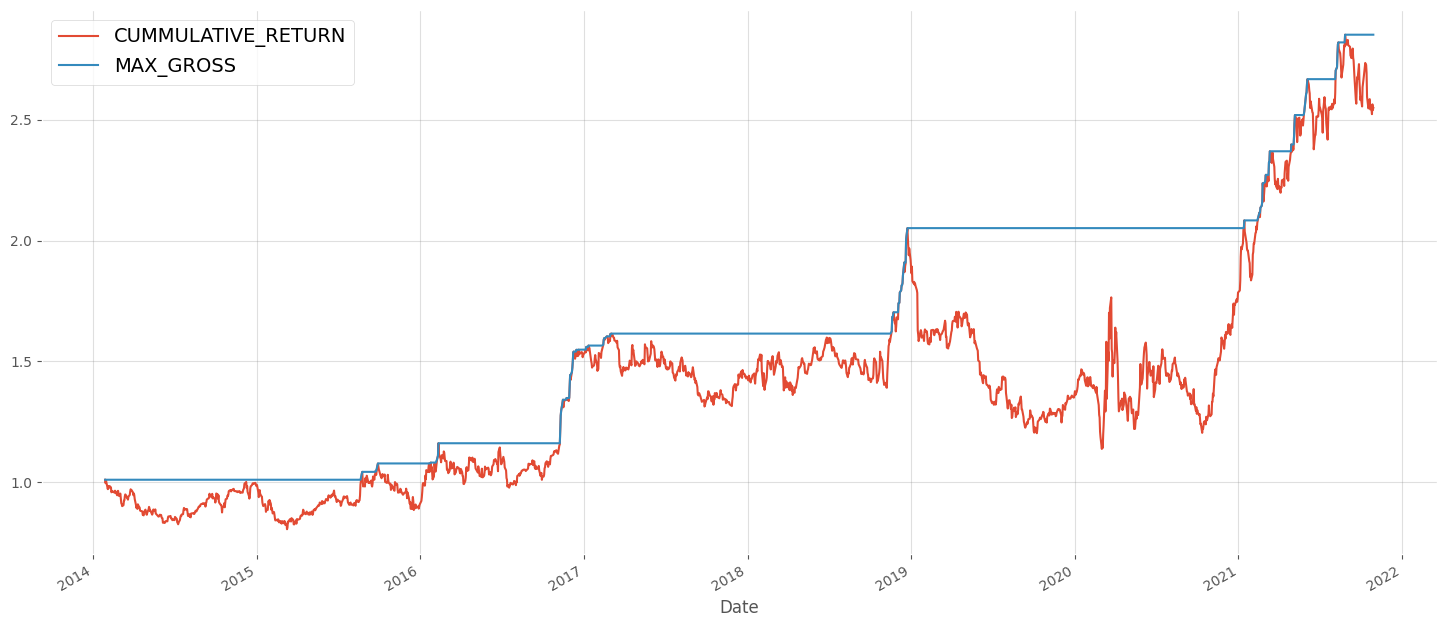

In [99]:
(
    BUY_SELL_GS
    [['CUMMULATIVE_RETURN','MAX_GROSS']]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

In [100]:
#JP Morgan Drawdown

In [101]:
BUY_SELL_JPM = \
    BUY_SELL_JPM.dropna()

BUY_SELL_JPM['BUYSELL'] = \
    (
    np.where(BUY_SELL_JPM['SHORT_SMA'] > BUY_SELL_JPM['LONG_SMA'], 1, -1)
    )

BUY_SELL_JPM['LOG_RETURN'] = \
    np.log(JPM['Adj Close'] / JPM['Adj Close'].shift(1))

BUY_SELL_JPM['STRATEGY_RETURN'] = \
    BUY_SELL_JPM['BUYSELL'].shift(1) * BUY_SELL_JPM['LOG_RETURN']

BUY_SELL_JPM['CUMMULATIVE_RETURN'] = \
    BUY_SELL_JPM['STRATEGY_RETURN'].cumsum().apply(np.exp)

BUY_SELL_JPM['MAX_GROSS'] = \
    BUY_SELL_JPM['CUMMULATIVE_RETURN'].cummax()

### <font color = red> Answer 8 (`visualization component of JPM`) is presented in the cell below: </font>

<Axes: xlabel='Date'>

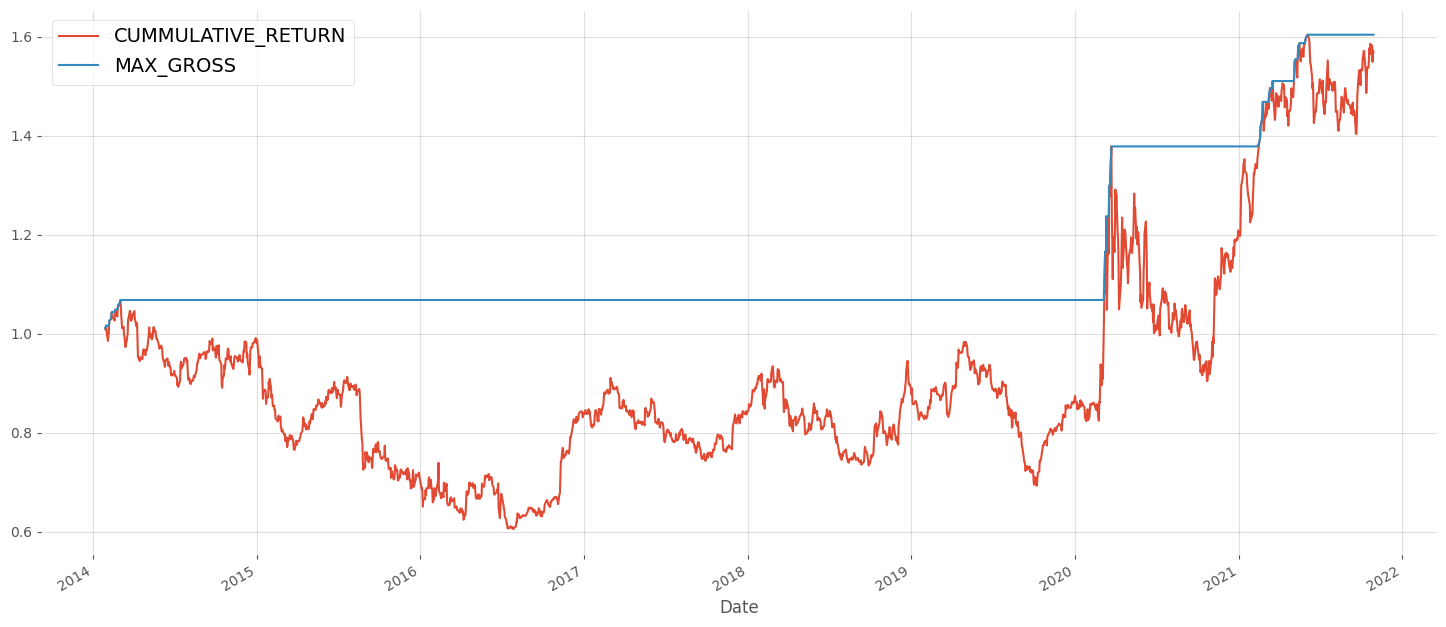

In [102]:
(
    BUY_SELL_JPM
    [['CUMMULATIVE_RETURN','MAX_GROSS']]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

### Drawdown

$$ Drawdown = \frac{Current Value}{Peak Value} - 1$$

Consider an example to understand the concept of maximum drawdown. Assume an investment portfolio has an initial value of 500,000. The portfolio increases to 750,000 over a period of time, before plunging to 400,000 in a ferocious bear market. It then rebounds to 600,000, before dropping again to 350,000. What is the maximum drawdown?

$$ \text {The maximum drawdown in this case is} $$

$$ \frac {$ 350,000 - $ 750,000}{$ 750,000} = -53.33\% $$

In [103]:
# GS Max Drawdown

In [104]:
drawdown_gs = (BUY_SELL_GS['CUMMULATIVE_RETURN']/BUY_SELL_GS['MAX_GROSS']) - 1

drawdown_gs.min()

-0.4457505581106681

In [105]:
periods =\
(
    drawdown_gs[drawdown_gs == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_gs[drawdown_gs == 0].index[   : -1].to_pydatetime()
)
periods.max()

datetime.timedelta(days=752)

In [106]:
# JPM Max Drawdown

In [107]:
drawdown_jpm = (BUY_SELL_JPM['CUMMULATIVE_RETURN']/BUY_SELL_JPM['MAX_GROSS']) - 1

drawdown_jpm.min()

-0.4335769932819892

In [108]:
periods =\
(
    drawdown_jpm[drawdown_jpm == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_jpm[drawdown_jpm == 0].index[   : -1].to_pydatetime()
)
periods.max()

datetime.timedelta(days=2198)

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about 44.57 percentage points.
    The longest drawdown period lasts for 752 days.
    
    As to JPM,
    
    The maximum drawdown is about 43.35 percentage points.
    The longest drawdown period lasts for 2198 days.
    

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [109]:
capital = 3e5

In [110]:
#Goldman Sachs

In [111]:
BUY_SELL_GS.head()

,BUY_SELL,SHORT_SMA,LONG_SMA,POSITION,BUYSELL,LOG_RETURN,STRATEGY_RETURN,CUMMULATIVE_RETURN,MAX_GROSS
Date,,,,,,,,,
2014-01-27,1,146.855374,142.406928,1.0,1,-0.017754,NaN,NaN,NaN
2014-01-28,1,146.544802,142.475156,0.0,1,0.009428,0.009428,1.009472,1.009472
2014-01-29,1,146.106658,142.493531,0.0,1,-0.014236,-0.014236,0.995203,1.009472
2014-01-30,1,145.746944,142.557284,0.0,1,0.011767,0.011767,1.006983,1.009472
2014-01-31,1,145.317162,142.573656,0.0,1,-0.010426,-0.010426,0.996539,1.009472


In [112]:
BUY_SELL_JPM.head()

,BUY_SELL,SHORT_SMA,LONG_SMA,POSITION,BUYSELL,LOG_RETURN,STRATEGY_RETURN,CUMMULATIVE_RETURN,MAX_GROSS
Date,,,,,,,,,
2014-01-27,1,44.066009,42.872000,1.0,1,0.000000,NaN,NaN,NaN
2014-01-28,1,44.015725,42.918879,0.0,1,0.011730,0.011730,1.011799,1.011799
2014-01-29,1,43.941759,42.969131,0.0,1,-0.003774,-0.003774,1.007987,1.011799
2014-01-30,1,43.882389,43.026726,0.0,1,0.008428,0.008428,1.016518,1.016518
2014-01-31,1,43.804291,43.073964,0.0,1,-0.011495,-0.011495,1.004901,1.016518


In [113]:
capital_gs = \
    capital * BUY_SELL_GS['CUMMULATIVE_RETURN'][-1]
capital_gs

764946.7468820823

In [114]:
#JP Morgan

In [115]:
capital_jpm = \
    capital * BUY_SELL_JPM['CUMMULATIVE_RETURN'][-1]
capital_jpm

470621.4741299145

In [116]:
CASH_LEFT = \
    capital_gs + capital_jpm
CASH_LEFT

1235568.2210119967

### <font color = red> Answer 9 </font>


In [117]:
print(f'Total capital left is {round(CASH_LEFT,2)}')

Total capital left is 1235568.22


###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [118]:
GS_Buy = (BUY_SELL_GS['POSITION'] == 1).sum()
GS_Buy

19

In [119]:
GS_Sell = (BUY_SELL_GS['POSITION'] == -1).sum()
GS_Sell

19

In [120]:
JPM_Buy = (BUY_SELL_JPM['POSITION'] == 1).sum()
JPM_Buy

23

In [121]:
JPM_Sell = (BUY_SELL_JPM['POSITION'] == -1).sum()
JPM_Sell

22

In [122]:
Total = \
    GS_Buy + GS_Sell + JPM_Buy + JPM_Sell
Total

83

### <font color = red> Answer 10 </font>

    The answer is 83 .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊